# MultiThreading

## Intro

In [1]:
import threading
import requests

def download_page(url):
    response = requests.get(url)
    print(f"Downloaded {url} ({len(response.content)} bytes)")

def main():
    urls = ["https://example.com", "https://google.com", "https://github.com"]

    # Create threads for each URL
    threads = []
    for url in urls:
        thread = threading.Thread(target=download_page, args=(url,))
        threads.append(thread)
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

main()

Downloaded https://github.com (230041 bytes)
Downloaded https://google.com (21788 bytes)
Downloaded https://example.com (1256 bytes)


In [2]:
main()

Downloaded https://github.com (230053 bytes)
Downloaded https://google.com (21769 bytes)
Downloaded https://example.com (1256 bytes)


In [6]:
import threading
import os

def task1():
    print("Task 1 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 1: {}".format(os.getpid()))
 
def task2():
    print("Task 2 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))
 
def main():
 
    print("ID of process running main program: {}".format(os.getpid()))
 
    print("Main thread name: {}".format(threading.current_thread().name))
 
    t1 = threading.Thread(target=task1, name='t1')
    t2 = threading.Thread(target=task2, name='t2')
 
    t1.start()
    t2.start()
 
    t1.join()
    t2.join()

main()

ID of process running main program: 8668
Main thread name: MainThread
Task 1 assigned to thread: t1
ID of process running task 1: 8668
Task 2 assigned to thread: t2
ID of process running task 2: 8668


In [8]:
from concurrent.futures import ThreadPoolExecutor
import threading
import os
import pandas as pd

print("Main thread {} running".format(threading.current_thread().name))

def worker():
    print("Worker thread {} running".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))
    
    print("Worker thread {} start loading csv file".format(threading.current_thread().name))
    pd.read_csv("/home/phinguyen/ETL_Pipeline_with_Spark_01/sample_data/Product.csv")

pool = ThreadPoolExecutor(max_workers=2)

pool.submit(worker)
pool.submit(worker)
 
pool.shutdown(wait=True)
 
print("Main thread {} running".format(threading.current_thread().name))
print("ID of process running task 2: {}".format(os.getpid()))

Main thread MainThread running
Worker thread ThreadPoolExecutor-1_0 running
ID of process running task 2: 8668
Worker thread ThreadPoolExecutor-1_0 start loading csv file
Worker thread ThreadPoolExecutor-1_1 running
ID of process running task 2: 8668
Worker thread ThreadPoolExecutor-1_1 start loading csv file
Main thread MainThread running
ID of process running task 2: 8668


## Multithreading Synchronization
Thread synchronization is defined as a mechanism which ensures that two or more concurrent threads do not simultaneously execute some particular program segment known as critical section.

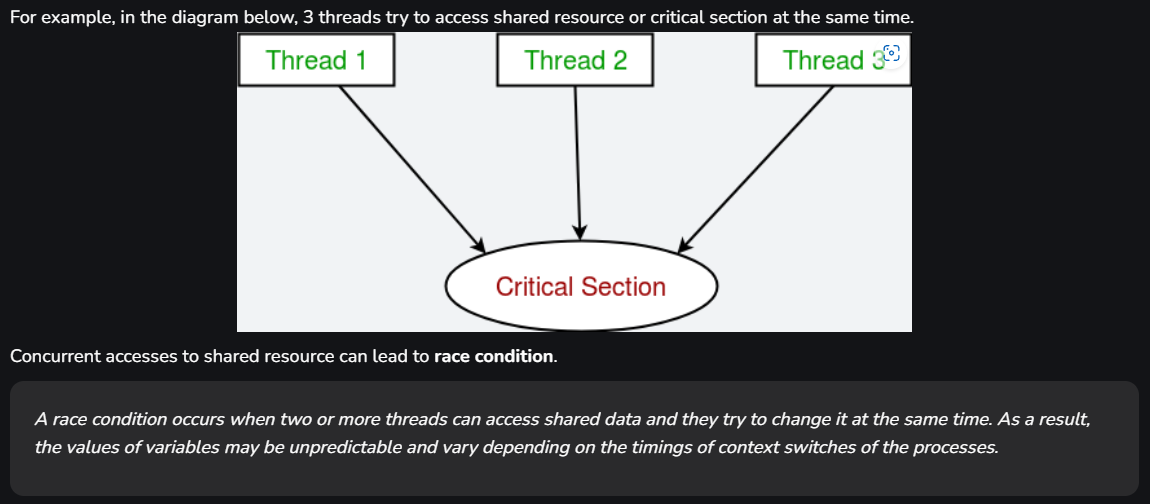

### Race condition: 2 or more threads trying to modify the shared data at the same time

In [12]:
import os
os.getcwd()

'/home/phinguyen/ETL_Pipeline_with_Spark_01/notebooks'

In [13]:
os.chdir(path='/home/phinguyen/ETL_Pipeline_with_Spark_01')

In [18]:
import threading
import pandas as pd

x = 0 # global variable

def increment():
    global x
    df = pd.read_csv("sample_data/Product.csv") # I/O
    x += 1 # CPU
    print(f"x is modify to {x} by {threading.current_thread().name}")

def thread_task():
    for i in range(5):
        print(f"Thread {threading.current_thread().name} is operating {i} increment")
        increment()

def main_task():
    global x
    x = 0
    
    t1 = threading.Thread(name="Thread-1", target=thread_task)
    t2 = threading.Thread(name="Thread-2", target=thread_task)
    
    t1.start()
    t2.start()
    
    # wait until threads finish their job 
    t1.join() 
    t2.join()

def main():
    for i in range(3): 
        main_task() 
        print("Iteration {0}: x = {1}".format(i,x))

main()

Thread Thread-1 is operating 0 increment
Thread Thread-2 is operating 0 increment
x is modify to 1 by Thread-1
Thread Thread-1 is operating 1 increment
x is modify to 2 by Thread-2
Thread Thread-2 is operating 1 increment
x is modify to 3 by Thread-1
Thread Thread-1 is operating 2 increment
x is modify to 4 by Thread-2
Thread Thread-2 is operating 2 increment
x is modify to 5 by Thread-1
Thread Thread-1 is operating 3 increment
x is modify to 6 by Thread-2
Thread Thread-2 is operating 3 increment
x is modify to 7 by Thread-1
Thread Thread-1 is operating 4 increment
x is modify to 8 by Thread-2
Thread Thread-2 is operating 4 increment
x is modify to 9 by Thread-1
x is modify to 10 by Thread-2
Iteration 0: x = 10
Thread Thread-1 is operating 0 increment
Thread Thread-2 is operating 0 increment
x is modify to 1 by Thread-1
Thread Thread-1 is operating 1 increment
x is modify to 2 by Thread-2
Thread Thread-2 is operating 1 increment
x is modify to 3 by Thread-2
Thread Thread-2 is operating

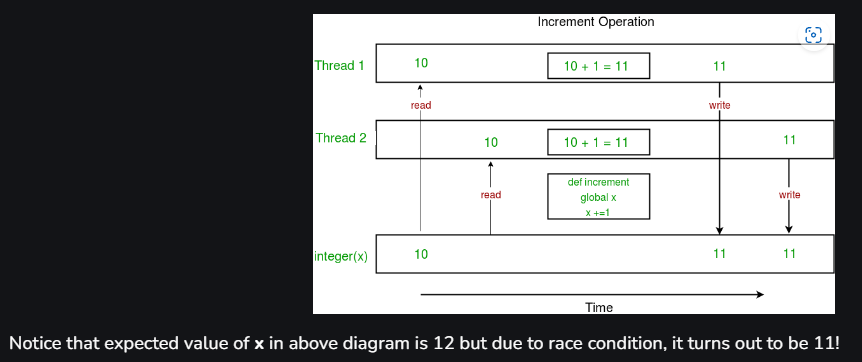

In [10]:
import threading 

# global variable x 
x = 0

def increment(): 
	""" 
	function to increment global variable x 
	"""
	global x 
	temp = x 
	temp += 1
	x = temp

def thread_task(): 
	""" 
	task for thread 
	calls increment function 100000 times. 
	"""
	for _ in range(100000): 
		increment() 

def main_task(): 
	global x 
	# setting global variable x as 0 
	x = 0

	# creating threads 
	t1 = threading.Thread(target=thread_task) 
	t2 = threading.Thread(target=thread_task) 

	# start threads 
	t1.start() 
	t2.start() 

	# wait until threads finish their job 
	t1.join() 
	t2.join() 

def main():
	for i in range(10): 
		main_task() 
		print("Iteration {0}: x = {1}".format(i,x))

main()


Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


In [21]:
import threading
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

x = 0 # global variable

def increment():
    global x
    df = pd.read_csv("sample_data/Product.csv") # I/O
    x += 1 # CPU
    print(f"x is modify to {x} by {threading.current_thread().name}")

def thread_task(a, b):
    print(a + b)
    print(f"Launch job on thread {threading.current_thread().name}")
    for i in range(5):
        print(f"Thread {threading.current_thread().name} is operating {i} increment")
        increment()

def main_task():
    global x
    x = 0
    
    pool = ThreadPoolExecutor(max_workers=2)
    for i in range(2):
        pool.submit(thread_task, 2, 3)
    
    pool.shutdown(wait=True)

def main():
    for i in range(3): 
        main_task() 
        print("Iteration {0}: x = {1}".format(i,x))

main()

5
Launch job on thread ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 0 increment
5
Launch job on thread ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 0 increment
x is modify to 1 by ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 1 increment
x is modify to 2 by ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 1 increment
x is modify to 3 by ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 2 increment
x is modify to 4 by ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 2 increment
x is modify to 5 by ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 3 increment
x is modify to 6 by ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 3 increment
x is modify to 7 by ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 4 increment
x is modify to 8 by ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 4 increment
x is modify to